In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import joblib


In [20]:
df = pd.read_csv('11.csv', encoding='latin1')


In [21]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [22]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
X = df[['QUANTITYORDERED', 'SALES']].values 

In [25]:
wcss = []   

In [ ]:
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


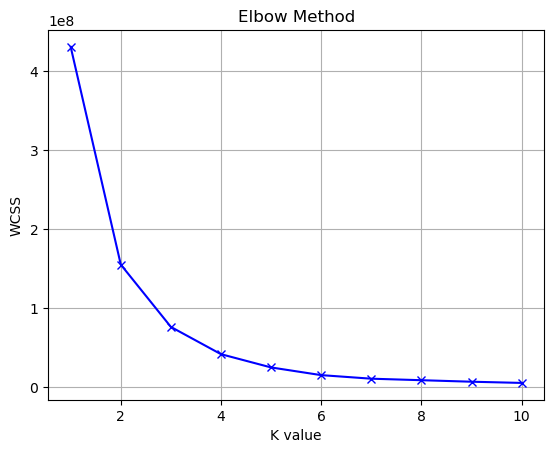

In [13]:
ks = list(range(1, 11))
plt.plot(ks, wcss, 'bx-')
plt.title("Elbow Method")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()  # Display the plot


In [14]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,10268.204082,33.986395,84.138639,6.673469,3446.003537,2.673469,6.986395,2003.863946,100.632653
std,106.742036,9.740458,19.897255,3.830596,1717.988835,1.171367,3.734303,0.746127,40.046562
min,10120.000000,15.000000,26.880000,1.000000,652.350000,1.000000,1.000000,2003.000000,33.000000
25%,10148.000000,26.000000,66.390000,3.000000,2249.005000,2.000000,4.000000,2003.000000,70.000000
50%,10270.000000,33.000000,98.050000,6.000000,3160.740000,3.000000,7.000000,2004.000000,99.000000
75%,10361.000000,41.000000,100.000000,10.000000,4410.060000,4.000000,11.000000,2004.000000,121.000000
max,10420.000000,66.000000,100.000000,15.000000,9774.030000,4.000000,12.000000,2005.000000,214.000000


In [15]:
ss = StandardScaler()
scaled = ss.fit_transform(X)


In [16]:
# Recalculating WCSS for scaled data
wcss = []
for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=42)
    clustering.fit(scaled)
    wcss.append(clustering.inertia_)


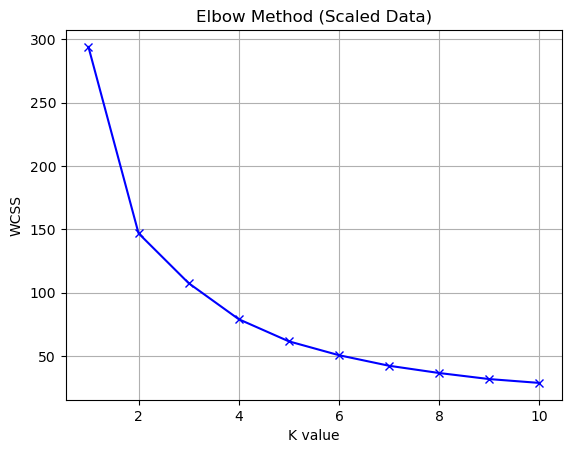

In [17]:
# Plotting the Elbow Method graph for scaled data
plt.plot(ks, wcss, 'bx-')
plt.title("Elbow Method (Scaled Data)")
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.grid(True)
plt.show()  # Display the plot


In [18]:
# Fit with the optimal number of clusters (replace optimal_k with the identified optimal value)
optimal_k = 4  # Example optimal value; adjust based on elbow method results
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(scaled)


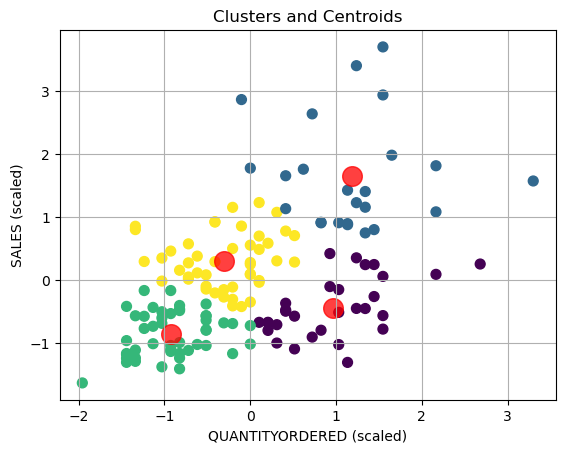

In [19]:
# Visualizing the clusters
plt.scatter(scaled[:, 0], scaled[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)
plt.title('Clusters and Centroids')
plt.xlabel('QUANTITYORDERED (scaled)')
plt.ylabel('SALES (scaled)')
plt.grid(True)
plt.show()
